In [269]:
import numpy as np
import pandas as pd

In [270]:
df = pd.read_csv("data/processed/merged.csv")
df

,county,state,year,ntop_ibs,nlocal_ibs,treatment,high_school_graduate_includes_equivalency,some_college_no_degree,married_couple_family,with_own_children_of_the_householder_under_18_years,...,annual_avg_estabs,annual_avg_emplvl,total_annual_wages,taxable_annual_wages,annual_contributions,annual_avg_wkly_wage,avg_annual_pay,move_post2010,educ_nohs,educ_further
0,ada,id,2016,0.0,0.0,1.0,23.5,11.1,63.7,26.8,...,14927.0,226196.0,1.040892e+10,4.876201e+09,56513290.0,885.0,46017.0,50.5,26.0,133.3
1,ada,id,2019,0.0,2.0,1.0,19.8,24.9,53.5,22.5,...,16442.0,252953.0,1.314580e+10,6.155561e+09,42858366.0,999.0,51969.0,49.4,5.2,50.1
2,adams,co,2016,0.0,0.0,1.0,21.7,9.0,70.3,35.8,...,10394.0,198368.0,1.015594e+10,2.256437e+09,50351378.0,985.0,51197.0,56.3,38.5,105.7
3,adams,co,2019,0.0,15.0,1.0,29.8,21.0,51.8,23.7,...,11630.0,225848.0,1.279172e+10,2.796571e+09,43959576.0,1089.0,56639.0,45.7,15.1,34.0
4,adams,il,2016,0.0,0.0,0.0,24.3,7.3,67.3,27.8,...,1812.0,32322.0,1.280316e+09,3.249157e+08,7342135.0,762.0,39612.0,41.9,41.3,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,york,sc,2019,0.0,0.0,0.0,23.9,23.8,48.6,19.5,...,6450.0,100346.0,4.785245e+09,1.319552e+09,18312741.0,917.0,47688.0,42.2,7.2,45.2
1580,yuba,ca,2016,0.0,0.0,0.0,31.8,11.0,70.6,35.9,...,1602.0,16685.0,7.989854e+08,7.560441e+07,3667830.0,921.0,47885.0,57.6,33.0,103.0
1581,yuba,ca,2019,0.0,0.0,0.0,25.6,27.6,50.3,24.2,...,1694.0,18564.0,9.871101e+08,9.327558e+07,4035971.0,1023.0,53173.0,44.1,19.1,27.9
1582,yuma,az,2016,0.0,0.0,0.0,26.3,5.8,72.7,30.9,...,3156.0,66432.0,2.379464e+09,5.010725e+08,24659203.0,689.0,35818.0,49.2,37.6,89.6


In [271]:
selected_cols =[
    "county",
    "state",
    "year",
    "treatment",
    "median_listing_price",
    "median_days_on_market",
    "median_rooms", 
    "homeowner_vacancy_rate", 
    "mean_travel_time_to_work_minutes", 
    "math_prof_pct", 
    "english_prof_pct", 
    "median_square_feet", 
    "median_age_years", 
    "move_post2010",
    "annual_avg_emplvl", 
    "median_household_income_dollars", 
    "per_capita_income_dollars", 
    "popestimate", 
    "rnaturalinc", 
    "rnetmig", 
    "educ_nohs",
    "educ_further",
    "average_household_size", 
    "white", 
    "mean_cash_public_assistance_income_dollars", 
    "construction", 
    "mean_retirement_income_dollars", 
    "ntop_ibs",
    "nlocal_ibs"
]
df["treatment"] = df["treatment"].astype(int)
df = df[selected_cols]
df

,county,state,year,treatment,median_listing_price,median_days_on_market,median_rooms,homeowner_vacancy_rate,mean_travel_time_to_work_minutes,math_prof_pct,...,rnetmig,educ_nohs,educ_further,average_household_size,white,mean_cash_public_assistance_income_dollars,construction,mean_retirement_income_dollars,ntop_ibs,nlocal_ibs
0,ada,id,2016,1,279950.0,43.0,5.8,1.0,21.2,45.758471,...,21.621979,26.0,133.3,2.75,1.7,2267.0,1441105.0,21889.0,0.0,0.0
1,ada,id,2019,1,377292.5,56.0,6.0,1.2,21.4,42.856647,...,22.814728,5.2,50.1,2.60,93.7,2372.0,1480534.0,25828.0,0.0,2.0
2,adams,co,2016,1,380050.0,24.0,5.8,0.8,28.3,21.781656,...,6.083930,38.5,105.7,3.07,6.2,2830.0,2135210.0,24070.0,0.0,0.0
3,adams,co,2019,1,425045.0,51.5,5.7,1.0,30.5,23.689123,...,4.834876,15.1,34.0,3.04,85.5,3139.0,2223214.0,26379.0,0.0,15.0
4,adams,il,2016,0,120050.0,71.0,5.8,1.0,17.3,27.395833,...,-5.926037,41.3,117.0,2.46,0.6,NaN,110770.0,20861.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,york,sc,2019,0,313989.5,72.0,5.9,0.4,27.7,51.645833,...,23.217205,7.2,45.2,2.68,76.0,NaN,457710.0,27463.0,0.0,0.0
1580,yuba,ca,2016,0,269950.0,41.0,5.2,1.2,32.3,31.663393,...,4.429619,33.0,103.0,2.93,9.8,3628.0,116639.0,29299.0,0.0,0.0
1581,yuba,ca,2019,0,300000.0,67.0,5.5,0.0,27.2,34.841518,...,6.938710,19.1,27.9,2.95,82.5,4231.0,148140.0,25445.0,0.0,0.0
1582,yuma,az,2016,0,190049.0,83.0,4.8,1.8,20.0,32.534960,...,2.744688,37.6,89.6,2.77,20.9,1280.0,151615.0,24526.0,0.0,0.0


In [272]:
def summary_group_total(df, group, f, tot_name="All", cols=None, drop=None, sf=2):
    
    if cols is not None:
        df = df[group + cols]
    
    if drop is not None:
        df = df.drop(drop, axis=1)
        
    tot_agg = df.agg(f).T
    df = df.groupby(group).agg(f).T
    df[tot_name] = tot_agg
    
    return df.round(sf)

In [273]:
groups =[
    "median_listing_price",
    "median_days_on_market",
    "median_rooms", 
    "homeowner_vacancy_rate", 
    "mean_travel_time_to_work_minutes", 
    "math_prof_pct", 
    "english_prof_pct", 
    "median_square_feet", 
    "median_age_years", 
    "moved_in_2010_to_2014",
    "annual_avg_emplvl", 
    "median_household_income_dollars", 
    "per_capita_income_dollars", 
    "popestimate", 
    "rnaturalinc", 
    "rnetmig", 
    "less_than_9th_grade",
    "associates_degree",
    "average_household_size", 
    "white", 
    "mean_cash_public_assistance_income_dollars", 
    "construction", 
    "mean_retirement_income_dollars", 
    "ntop_ibs",
    "nlocal_ibs"
]

In [274]:
treat_cont_comp = summary_group_total(df, "treatment", np.mean, drop=["year", "ntop_ibs", "nlocal_ibs"])
treat_cont_comp

treatment,0,1,All
median_listing_price,262823.15,344363.01,274354.04
median_days_on_market,80.19,68.60,78.55
median_rooms,5.73,5.45,5.69
homeowner_vacancy_rate,1.64,1.61,1.64
mean_travel_time_to_work_minutes,25.22,25.20,25.21
math_prof_pct,47.03,45.53,46.82
english_prof_pct,51.57,49.29,51.25
median_square_feet,1812.60,1915.57,1827.17
median_age_years,38.92,36.75,38.62
move_post2010,42.60,47.55,43.30


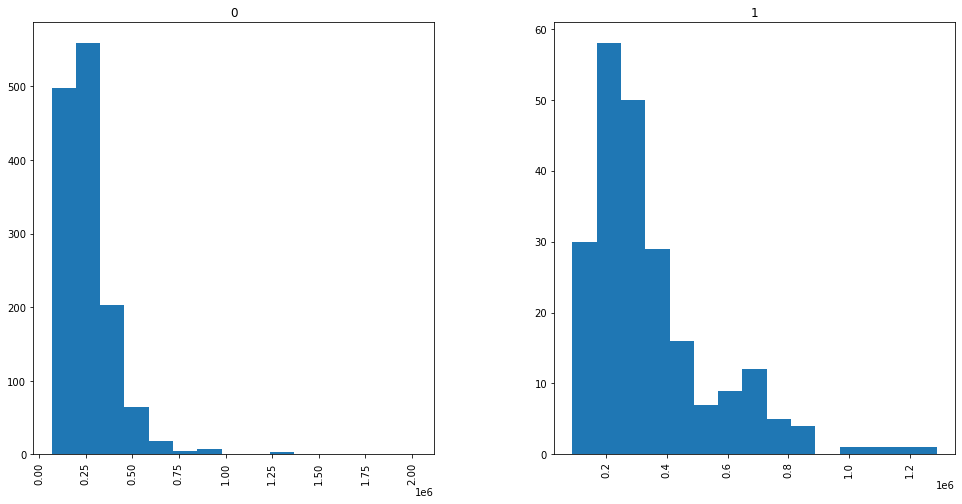

In [275]:
lst_prc_hist_comp = df.hist(column="median_listing_price", by="treatment", bins=15, figsize=(16,8))[0].get_figure()

In [276]:
lst_prc_hist_comp.savefig("media/lst_prc_hist_comp.png")

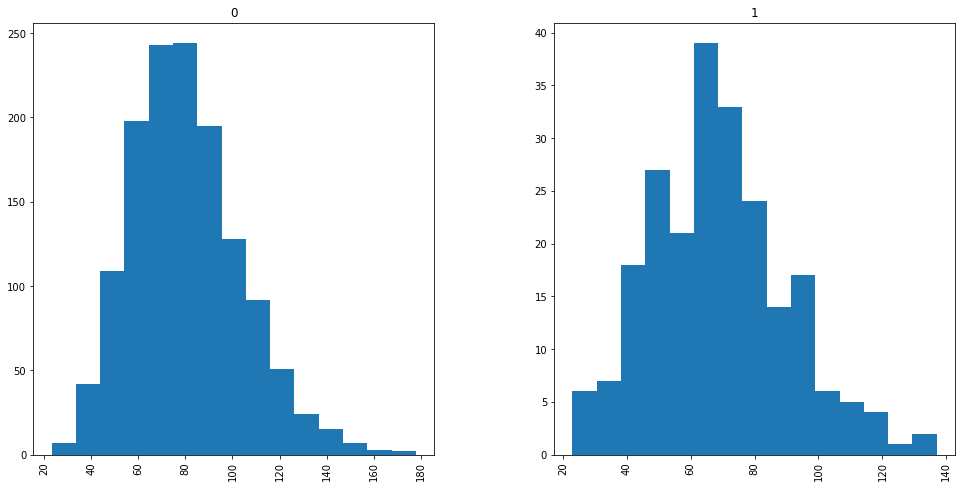

In [277]:
days_on_mkt_hist_comp = df.hist(column="median_days_on_market", by="treatment", bins=15, figsize=(16,8))[0].get_figure()

In [278]:
days_on_mkt_hist_comp.savefig("media/days_on_mkt_hist_comp.png")

In [279]:
treat_cont_comp.to_latex(bold_rows=True, caption="Treatment/Control Summary Statistics", label="treat_cont_comp")

'\\begin{table}\n\\centering\n\\caption{Treatment/Control Summary Statistics}\n\\label{treat_cont_comp}\n\\begin{tabular}{lrrr}\n\\toprule\n\\textbf{treatment} &          0 &           1 &        All \\\\\n\\midrule\n\\textbf{median\\_listing\\_price                      } &  262823.15 &   344363.01 &  274354.04 \\\\\n\\textbf{median\\_days\\_on\\_market                     } &      80.19 &       68.60 &      78.55 \\\\\n\\textbf{median\\_rooms                              } &       5.73 &        5.45 &       5.69 \\\\\n\\textbf{homeowner\\_vacancy\\_rate                    } &       1.64 &        1.61 &       1.64 \\\\\n\\textbf{mean\\_travel\\_time\\_to\\_work\\_minutes          } &      25.22 &       25.20 &      25.21 \\\\\n\\textbf{math\\_prof\\_pct                             } &      47.03 &       45.53 &      46.82 \\\\\n\\textbf{english\\_prof\\_pct                          } &      51.57 &       49.29 &      51.25 \\\\\n\\textbf{median\\_square\\_feet                        }

In [280]:
general_stats = df.describe().T[["mean", "std"]].drop(["year", "ntop_ibs", "nlocal_ibs"])
general_stats.round(2)

,mean,std
treatment,0.14,0.35
median_listing_price,274354.04,162236.86
median_days_on_market,78.55,23.45
median_rooms,5.69,0.53
homeowner_vacancy_rate,1.64,1.09
mean_travel_time_to_work_minutes,25.21,5.25
math_prof_pct,46.82,12.81
english_prof_pct,51.25,11.55
median_square_feet,1827.17,591.30
median_age_years,38.62,4.65


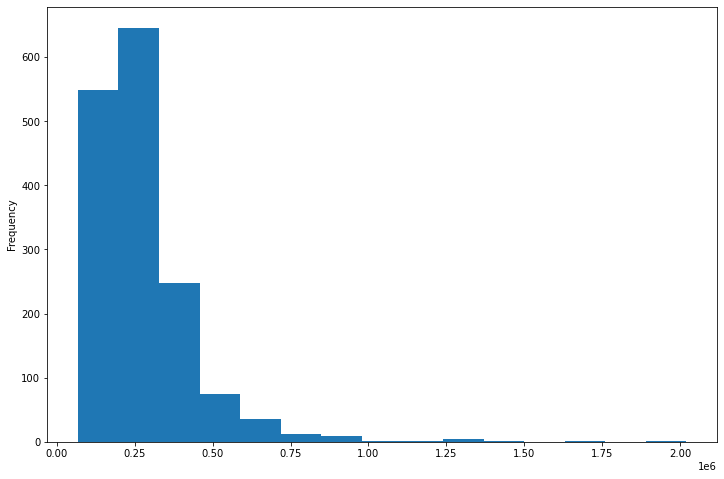

In [281]:
lst_prc_hist = df["median_listing_price"].plot.hist(bins=15, figsize=(12,8)).get_figure()

In [282]:
lst_prc_hist.savefig("media/lst_prc_hist.png")

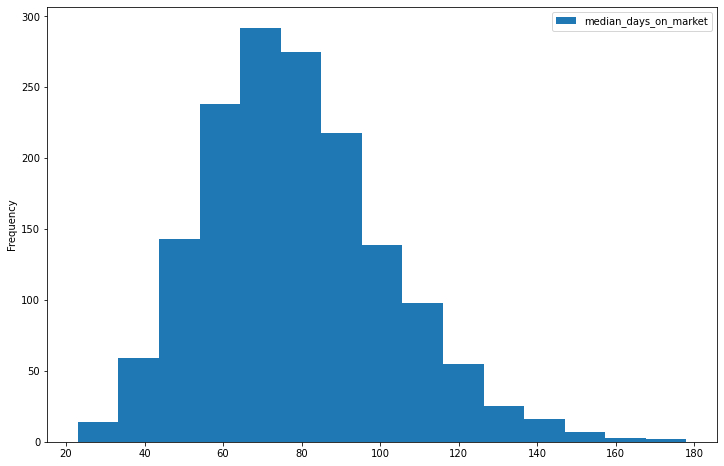

In [283]:
days_on_mkt_hist = df[["median_days_on_market"]].plot.hist(bins=15, figsize=(12,8)).get_figure()

In [284]:
days_on_mkt_hist.savefig("media/days_on_mkt_hist.png")

In [285]:
general_stats.to_latex(bold_rows=True, caption="General Summary Statistics", label="general_stats")

'\\begin{table}\n\\centering\n\\caption{General Summary Statistics}\n\\label{general_stats}\n\\begin{tabular}{lrr}\n\\toprule\n{} &           mean &           std \\\\\n\\midrule\n\\textbf{treatment                                 } &       0.141414 &  3.485583e-01 \\\\\n\\textbf{median\\_listing\\_price                      } &  274354.042614 &  1.622369e+05 \\\\\n\\textbf{median\\_days\\_on\\_market                     } &      78.553030 &  2.345368e+01 \\\\\n\\textbf{median\\_rooms                              } &       5.693813 &  5.329772e-01 \\\\\n\\textbf{homeowner\\_vacancy\\_rate                    } &       1.639657 &  1.087029e+00 \\\\\n\\textbf{mean\\_travel\\_time\\_to\\_work\\_minutes          } &      25.214646 &  5.247091e+00 \\\\\n\\textbf{math\\_prof\\_pct                             } &      46.819991 &  1.281202e+01 \\\\\n\\textbf{english\\_prof\\_pct                          } &      51.249663 &  1.155455e+01 \\\\\n\\textbf{median\\_square\\_feet                   

<AxesSubplot:>

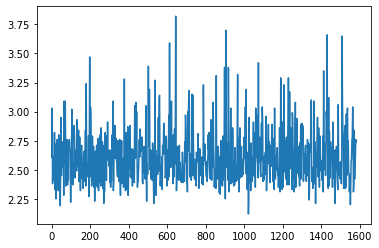

In [245]:
df.query("year == 2016")["average_household_size"].plot()

In [166]:
def standardize(col):
    return (
        col
        .lower()
        .strip()
        .replace(" ", "_")
        .replace("-", "_")
        .replace(".", "_")
        .replace(",", "_")
        .replace("\n", "_")
        .replace("(", "_")
        .replace(")", "")
        .replace("__", "_")
    )

def std_cols(df):
    df.columns = [standardize(col) for col in df.columns]
    if "year" in df.columns:
        df["year"] = df["year"].astype(int)
    return df

def lower(df, cols):
    for col in cols:
        df[col] = (
            df[col]
            .str.lower()
            .str.strip()
            .str.replace(" ", "_")
            .str.replace("-", "_")
            .str.replace("__", "_")
            .str.replace(".", "")
            .str.replace("*", "")
            .str.replace("+", "")
            .str.replace("fort_", "ft_")
            .str.replace("saint_", "st_")
            .str.replace("_county", "")
            .str.replace("_parish", "")
            .str.replace("_borough", "")
            .str.replace("_city", "")
            .str.replace("_municipality", "")
        )
    return df

hpi = (
    pd.read_csv("data/HPI_AT_BDL_county.csv")
    .pipe(std_cols)
    .pipe(lower, ["county", "state"])
)

hpi

,state,county,fips_code,year,hpi_with_2000_base
0,al,autauga,1001,1986,70.56
1,al,autauga,1001,1987,68.77
2,al,autauga,1001,1988,71.33
3,al,autauga,1001,1989,74.39
4,al,autauga,1001,1990,74.01
...,...,...,...,...,...
91530,wy,weston,56045,2016,194.18
91531,wy,weston,56045,2017,198.06
91532,wy,weston,56045,2018,201.77
91533,wy,weston,56045,2019,218.89


In [198]:
hpi2 = hpi.pipe(pd.merge, df[["state", "county", "treatment"]])\
          .query("year >= 2010")[["year", "hpi_with_2000_base", "treatment"]]\
          .query("hpi_with_2000_base != '.'")

hpi2["hpi_with_2000_base"] = hpi2["hpi_with_2000_base"].astype(float)
hpi2

,year,hpi_with_2000_base,treatment
66,2010,123.68,0
67,2010,123.68,0
68,2011,115.98,0
69,2011,115.98,0
70,2012,116.34,0
...,...,...,...
68211,2018,210.57,0
68212,2019,216.94,0
68213,2019,216.94,0
68214,2020,227.97,0


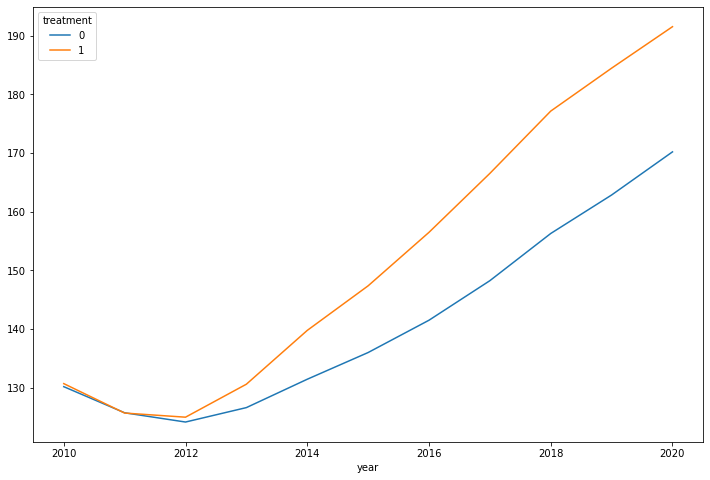

In [238]:
pta = hpi2.groupby(["treatment", "year"]).mean().T.stack().droplevel(0).plot(figsize=(12,8)).get_figure()

In [239]:
pta.savefig("media/pta.png")